In [1]:
import cv2
import os
from PIL import Image
import numpy as np



import matplotlib.pyplot as plt

import torch
import torchvision
import torch.nn as nn
                                                 
import torch.nn.functional as F
import torch.optim as optim
torch.set_printoptions(linewidth = 120)
torch.set_grad_enabled(True)

In [10]:
## collects in 2 folders 

## alpha and beta 




def collect_and_save(foldername, count):
    
    os.mkdir(foldername)
    
    faces_rect = ()
    
    def detect_faces(cascade, test_image):
        global counter 
        global faces_rect
        gray_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)   # opencv detects stuff in gray

        faces_rect = cascade.detectMultiScale(gray_image)  # classifier 

        for (x, y, w, h) in faces_rect:
            cv2.rectangle(gray_image, (x - 20, y-20), (x+w+ 20, y+h+70), (255, 0, 0), 8)   ## slight padding added to make sure the full face comes in 

        if faces_rect != ():

                fmt_name = foldername + "/" + str(faces_rect) +".png"

                crop_img = gray_image[y:y+h+70, x-20 :x+w +20]     ## added some padding  as + 20 and - 70

                cv2.imwrite(fmt_name,crop_img)
                
               ## crop
        return gray_image

    def feed(count):    ## q to quit 
        
        print (" will collect images for face now -- ")
        print ("")
        input("press enter to continue --")
        
        counter = 0 
        global faces_rect
        haar_cascade_face = cv2.CascadeClassifier('/home/mayukh09/anaconda3/lib/python3.7/site-packages/cv2/data/haarcascade_frontalcatface.xml')

        ## CAMERA CAPTURE FEED 
        cap = cv2.VideoCapture(0)

        while counter < count:                    
            # Capture frame-by-frame
            ret, frame = cap.read()

            frame = detect_faces(haar_cascade_face, frame)
            
            if faces_rect != ():
                counter+= 1
                print ("collected ", faces_rect,".png")
                
            cv2.imshow('frame', frame)
            
            if cv2.waitKey(1) & 0xFF == ord('q'):    ## press q to quit 
                break

        # When done, release the capture
        cap.release()
        cv2.destroyAllWindows()

    feed(count)
    
    print ("")
    print (count, " photos saved in  -- ", foldername)





In [11]:
collect_and_save("alpha", 50)

collect_and_save("beta", 50)

 will collect images for face now -- 

press enter to continue --


/home/mayukh09/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/home/mayukh09/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


collected  [[194 156 152 152]] .png
collected  [[189 148 166 166]] .png
collected  [[188 151 163 163]] .png
collected  [[193 154 157 157]] .png
collected  [[192 151 159 159]] .png
collected  [[191 151 155 155]] .png
collected  [[193 153 156 156]] .png
collected  [[196 154 152 152]] .png
collected  [[195 154 152 152]] .png
collected  [[192 155 157 157]] .png
collected  [[191 157 155 155]] .png
collected  [[193 157 152 152]] .png
collected  [[192 156 155 155]] .png
collected  [[192 152 156 156]] .png
collected  [[193 158 150 150]] .png
collected  [[199 160 140 140]] .png
collected  [[193 155 150 150]] .png
collected  [[191 152 156 156]] .png
collected  [[196 155 147 147]] .png
collected  [[195 155 145 145]] .png
collected  [[186 154 155 155]] .png
collected  [[188 161 146 146]] .png
collected  [[109 140 185 185]] .png
collected  [[112 139 171 171]] .png
collected  [[121 140 153 153]] .png
collected  [[114 134 167 167]] .png
collected  [[112 137 172 172]] .png
collected  [[117 147 205 205

In [12]:
def img_processor(): 
    
    os.mkdir("numpy")
    
    print ("processing images now ...")
    
    def load_images_from_folder(folder):
        images = []
        for filename in os.listdir(folder):
            path = folder +"/"+ filename

            im = Image.open(path)

            im = im.convert('L')
            
            # grayscale because sneakyboi was born colorblind

            images.append(im)
        return images


    def convert_to_numpy(arr, vector):
        np_arr = []
        for p in range (len(arr)):
            mario =  [np.array(arr[p]), vector]
            np_arr.append(mario)
        return np_arr

    def normalise(arr, width, height):  ## resize and standardise
        arr_copy = arr
        for p in range (len(arr)):
            doofus = arr[p]
            doofus = doofus.resize((width, height), Image.ANTIALIAS)
            arr_copy[p]= doofus
        return arr_copy


    def save(arr, name):
        fmt_name  = "numpy/" + name   # numpy array saver
        np.save(fmt_name, arr)

        print ("saved -- ", fmt_name)

    def cvt_raw_data():

        alpha_arr = load_images_from_folder("alpha")
        beta_arr = load_images_from_folder("beta")


        alpha_norm = normalise(alpha_arr , 200, 200)
        beta_norm = normalise(beta_arr , 200, 200)


        alpha_final = convert_to_numpy(alpha_norm, [0])
        beta_final = convert_to_numpy(beta_norm, [1])


        save(alpha_final, "alpha_final")
        save(beta_final, "beta_final")
        
    cvt_raw_data()

In [13]:
img_processor()

processing images now ...
saved --  numpy/alpha_final
saved --  numpy/beta_final


In [76]:
foo = np.array(np.load("numpy/alpha_final.npy"))   # checking a sample frame 

print (foo[4])

[array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
 list([0])]


In [46]:
def finalise_data():
    
    
    def preprocess( arr1, arr2 ):

        alpha = np.array(np.load(arr1))
        beta = np.array(np.load(arr2))

        gamma = np.concatenate((alpha, beta), axis = 0)  # concatenates - as the word is sugesting 
        

        np.random.shuffle(gamma)

        np.save ("numpy/binary_shuffled.npy", gamma)
        print ("final array has been saved as --   binary_shuffled.npy  - in folder -- numpy" )


    preprocess("numpy/alpha_final.npy", "numpy/beta_final.npy")
    

In [47]:
finalise_data()

final array has been saved as --   binary_shuffled.npy  - in folder -- numpy


In [22]:
########################  ALL FINE

In [2]:
def chug_to_tensor(images,labels):
    images = torch.from_numpy(images)
    labels = torch.tensor(labels)
    images = images.unsqueeze(0)
    images = images.unsqueeze(0)
 
    images = images.type(torch.float32)

    return (images,labels)
        
        
        
        
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, 5)
        
        # in_channels = 1, out_channels = 10 kernel_size = 5 (kernel is the filter thingy )
        
        self.pool = nn.MaxPool2d(4, 4)   ## changed from (3,3) to (4,4)
        
        self.conv2 = nn.Conv2d(10, 20, 5)
        
        self.fc1 = nn.Linear(2420, 125)       # linear starts 
        self.fc2 = nn.Linear(125, 80)
        self.fc3 = nn.Linear(80, 2)   ## op

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 2420)                   # reshape thingy
        x = F.relu(self.fc1(x))  
        
## DO NOT USE SOFTMAX AND CROSSENTROPY TOGETHER, USE relu FOR CrossEntropyLoss

        x = F.relu(self.fc2(x))

        x = self.fc3(x)
        return x

facenet = Net()


In [3]:

loss_arr = []
epoch_arr = []


def train_loop(epochs):
    
    foo = np.array(np.load("numpy/binary_shuffled.npy"))
        
    peanut = foo
    
    
    global loss_arr
    
    global epoch_arr 
        
    
    optimizer = optim.Adam(facenet.parameters(), lr = 0.001)
    
    for m in range (epochs):


        epoch_loss = 0

        single_batch = next(iter(peanut))

        for single_batch in peanut:

            image, label = single_batch
            optimizer.zero_grad()

            image,label = chug_to_tensor(image, label)

            pred = facenet(image).squeeze(1)
            
           

            loss = F.cross_entropy(pred,label)    # pain to fix if messed up

            loss.backward()   #backprop

            optimizer.step()

            epoch_loss += loss
            
            
        print ( m + 1, " epoch    ", "loss  - ", epoch_loss.item() )
        
        threshold = torch.tensor([0.1])
        
        if torch.gt(threshold, epoch_loss):     ## prevent overtraining
            
            print ("----")
            print (' overtraining prevented, loss was too low ')
            print ("----")
            break
         
    
        epoch_loss = epoch_loss.item()

        loss_arr.append(epoch_loss)
        epoch_arr.append(m+1)
            

        
    
        
    
        
    print ("training  done  ")  


def train_main():
    
    
    
    
    mario = int(input("enter number of epochs > 30 would be enough :  "))
    train_loop(mario)
    
def show_analysis():
    
    global loss_arr
    global epoch_arr
    def show_plot(epoch_arr, loss_arr):
        #print (loss_arr)
        plt.plot(epoch_arr, loss_arr, linewidth = 1.0 )
        plt.ylabel(" loss ")
        
        plt.xlabel(" epochs ")
        plt.show()
        
        
        
    show_plot(epoch_arr, loss_arr)




enter number of epochs > 30 would be enough :  45
1  epoch     loss  -  74.719970703125
2  epoch     loss  -  15.201547622680664
3  epoch     loss  -  1.5519505739212036
4  epoch     loss  -  31.677095413208008
5  epoch     loss  -  8.231146812438965
6  epoch     loss  -  4.368175983428955
7  epoch     loss  -  0.0019258648389950395
----
 overtraining prevented, loss was too low 
----
training  done  


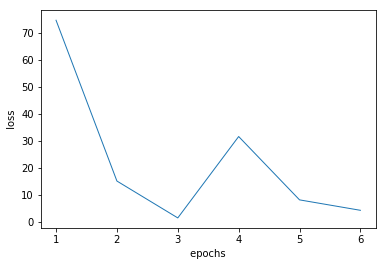

In [4]:
train_main()

show_analysis()


In [5]:
def convert_to_tensor(images):
    
    images = torch.from_numpy(images)
    
    images = images.unsqueeze(0)
    images = images.unsqueeze(0)
 
    images = images.type(torch.float32)

    return (images)




faces_rect = ()
def detect_faces(cascade, test_image):

    global faces_rect
    gray_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)   # opencv detects stuff in gray

    faces_rect = cascade.detectMultiScale(gray_image)  # classifier 
   
    
    
    for (x, y, w, h) in faces_rect:
        
        cv2.rectangle(gray_image, (x - 20, y-20), (x+w+ 20, y+h+70), (255, 0, 0), 8)   
        
        ## slight padding added to make sure the full face comes in 
        
    if faces_rect != ():
            print ("face !")
            crop_img = gray_image[y:y+h+70, x-20 :x+w +20]
            
            
#             print (crop_img)
            
            img = Image.fromarray(crop_img)

            img = img.resize((200, 200), Image.ANTIALIAS)  # resize
    
           

            im = np.array(img)


            im = torch.from_numpy(im)
            im = im.unsqueeze(0)
            im = im.unsqueeze(0)      # convert to 4d torch tensor

            im = im.float()

            res = facenet(im)
            
            print(res)
            
            prediction = res.argmax()
            print ("prediction  -------------------------- ", prediction)
            
        
           
    return gray_image



def cam_feed():    ## q to quit 
    global faces_rect
    haar_cascade_face = cv2.CascadeClassifier('/home/mayukh09/anaconda3/lib/python3.7/site-packages/cv2/data/haarcascade_frontalcatface.xml')

    ## CAMERA CAPTURE FEED 
    cap = cv2.VideoCapture(0)

    while(True):                    
        # Capture frame-by-frame
        ret, frame = cap.read()
        

        
        frame = detect_faces(haar_cascade_face, frame)
 
        
        
       
        cv2.imshow('frame', frame)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # When done, release the capture
    cap.release()
    cv2.destroyAllWindows()
    
    
cam_feed()



/home/mayukh09/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


face !
tensor([[ 3.7057, -1.1877]], grad_fn=<AddmmBackward>)
prediction  --------------------------  tensor(0)
face !
tensor([[ 4.4060, -1.4023]], grad_fn=<AddmmBackward>)
prediction  --------------------------  tensor(0)
face !
tensor([[ 6.2794, -2.5868]], grad_fn=<AddmmBackward>)
prediction  --------------------------  tensor(0)
face !
tensor([[-2.0238,  2.5389]], grad_fn=<AddmmBackward>)
prediction  --------------------------  tensor(1)
face !
tensor([[-0.2313,  1.1889]], grad_fn=<AddmmBackward>)
prediction  --------------------------  tensor(1)
face !
tensor([[-4.5694,  4.6053]], grad_fn=<AddmmBackward>)
prediction  --------------------------  tensor(1)
face !
tensor([[-4.2456,  4.3542]], grad_fn=<AddmmBackward>)
prediction  --------------------------  tensor(1)
face !
tensor([[-3.4678,  3.7440]], grad_fn=<AddmmBackward>)
prediction  --------------------------  tensor(1)


In [ ]:
## initially I was showing anant's face to which it showed the prediction as 0 

## and then I showed my face to which the prediction came to be 1 